**Sum of two independent Gaussian variables**

Two continous independent Gaussian variables $x$ and $y$, given corresponding probability density functions $f_1$ and $f_2$:

$f_1 \sim N(\mu_1, \sigma_1^2)$

$f_2 \sim N(\mu_2, \sigma_2^2)$

The probability density function $f_3$ of variable $z = x+y$ is calculated by following formula:

$f_3(z) = \int_{-\infty}^{+\infty} f_1(x)f_2(z-x)dx$

Variable $z$ is still Gaussian variable. 

$f_3 \sim N(\mu_1+\mu_2, \sigma_1^2+\sigma_2^2)$

We can show this property by following code.

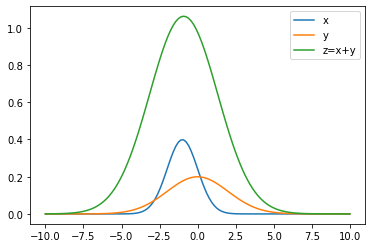

In [3]:
import numpy as np
from scipy import signal
import scipy.stats as stats
from matplotlib import pyplot as plt

x = np.linspace(-10, 10, 120)
pdf_1 = stats.norm.pdf(x, -1, 1)
pdf_2 = stats.norm.pdf(x, 0, 2)
pdf_1_2 = signal.fftconvolve(pdf_1, pdf_2,'same')

mp.plot(x, pdf_1, label='x')
mp.plot(x, pdf_2, label='y')
mp.plot(x, pdf_1_2, label='z=x+y')

plt.legend()
mp.show()